# PFAM Annotation Module

This notebook demonstrates the use of the two main methods from the `pfam_annotation.py` module in pyMut.


## 1. Import libraries and load data


In [1]:
import matplotlib.pyplot as plt

# Import pyMut
from pyMut import read_maf
from pyMut.utils.database import build_embedded_db, connect_db

# Load example data
maf_file = "../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz"
maf_data = read_maf(maf_file,assembly="37")

# Configure PFAM database
try:
    build_embedded_db(force_rebuild=False)
except:
    pass


2025-08-01 01:11:46,272 | INFO | pyMut.input | Starting MAF reading: ../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz
2025-08-01 01:11:46,273 | INFO | pyMut.input | Loading from cache: ../../../src/pyMut/data/examples/MAF/.pymut_cache/tcga_laml_VEP_annotated.maf_d6a2449e9d8817c9.parquet
2025-08-01 01:11:46,304 | INFO | pyMut.input | Cache loaded successfully in 0.03 seconds


✅ Database already exists at /home/luisruimore/Escritorio/TFG/src/pyMut/data/resources/data.duckdb


## 2. Using the annotate_pfam() method


In [2]:
# Annotate variants with PFAM domains
maf_data = maf_data.annotate_pfam()

# Show annotation examples
if 'pfam_id' in maf_data.data.columns:
    pfam_examples = maf_data.data[
        maf_data.data['pfam_id'].notna()
    ][['Hugo_Symbol', 'Protein_Change', 'uniprot', 'aa_pos', 'pfam_id', 'pfam_name']].head(10)
    display(pfam_examples)


2025-08-01 01:11:52,254 | INFO | pyMut.analysis.pfam_annotation | UniProt resolution summary:
2025-08-01 01:11:52,254 | INFO | pyMut.analysis.pfam_annotation |    Total identifiers processed: 676
2025-08-01 01:11:52,255 | INFO | pyMut.analysis.pfam_annotation |    Direct accessions: 669
2025-08-01 01:11:52,255 | INFO | pyMut.analysis.pfam_annotation |    Resolved via short_name: 0
2025-08-01 01:11:52,255 | INFO | pyMut.analysis.pfam_annotation |    Resolved via external ID: 0
2025-08-01 01:11:52,256 | INFO | pyMut.analysis.pfam_annotation |    Unresolved: 7
2025-08-01 01:11:52,854 | INFO | pyMut.analysis.pfam_annotation | Variantes anotadas con PFAM: 317/775
2025-08-01 01:11:53,007 | INFO | pyMut.analysis.pfam_annotation | 
Final annotation summary:
2025-08-01 01:11:53,007 | INFO | pyMut.analysis.pfam_annotation |    Total variants processed: 2,091
2025-08-01 01:11:53,008 | INFO | pyMut.analysis.pfam_annotation |    UniProt identifiers resolved: 669/676
2025-08-01 01:11:53,008 | INFO |

,Hugo_Symbol,Protein_Change,uniprot,aa_pos,pfam_id,pfam_name
0,KIAA1529,p.T431T,None,431.0,PF00004,PF00004
1,KIAA1529,p.R581H,Q9BS26,581.0,PF00102,PF00102
2,TBC1D2,p.L593R,None,593.0,PF00102,PF00102
3,LPPR1,p.T325I,None,325.0,PF00581,PF00581
4,BAAT,p.T376M,O95347,376.0,PF00667,PF00667
5,FKTN,<NA>,None,NaN,PF01112,PF01112
6,ZNF462,p.R1680C,Q9Y2D5,1680.0,PF01821,PF01821
7,ACTL7A,p.G426R,None,426.0,PF02221,PF02221
8,UGCG,p.Y47Y,A0A1B0GUV7,47.0,PF06327,PF06327
9,C9orf43,p.T181A,Q13219,181.0,PF13087,PF13087


## 3. Using the pfam_domains() method


,pfam_id,pfam_name,n_genes,n_variants
138,PF04118,PF04118,8,7
51,PF00520,PF00520,6,6
186,PF13853,PF13853,4,5
152,PF07679,PF07679,4,5
36,PF00271,PF00271,3,5
15,PF00069,PF00069,3,4
35,PF00270,PF00270,4,4
13,PF00063,PF00063,3,3
10,PF00041,PF00041,3,3
216,PF21114,PF21114,3,3


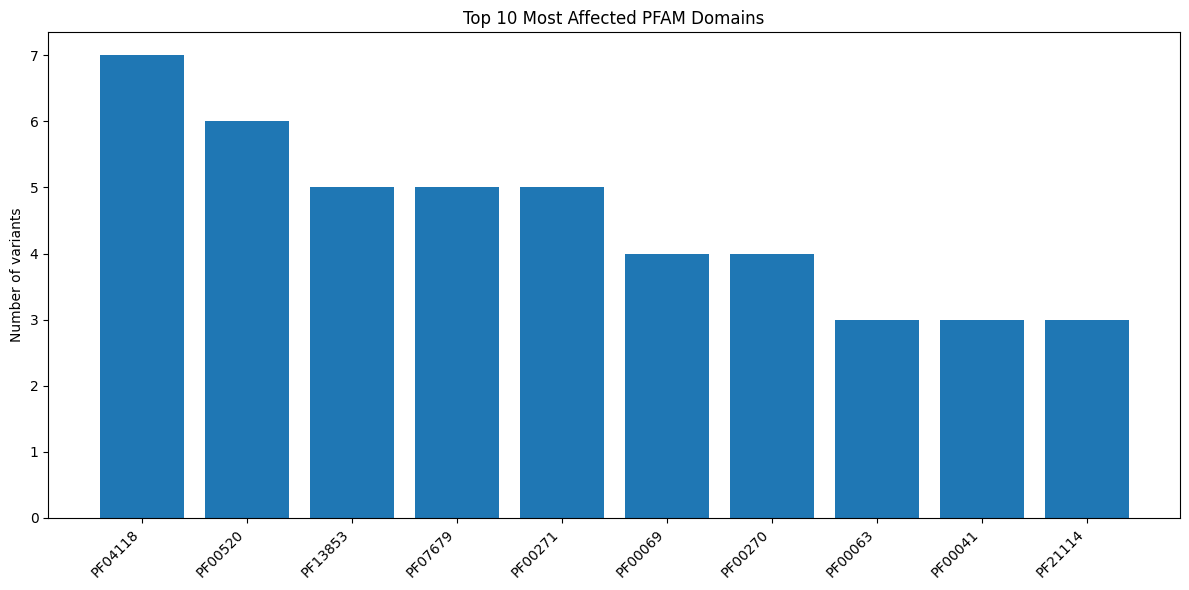

,uniprot,aa_pos,pfam_id,pfam_name,n_variants,n_genes
0,A0A0B4J262,28.0,PF00431,PF00431,1,1
33,Q14678,405.0,PF00096,PF00096,1,1
35,Q5JUK3,266.0,PF00084,PF00084,1,1
36,Q6ZU80,28.0,PF08647,PF08647,1,1
37,Q8NEA6,741.0,PF03250,PF03250,1,1
38,Q8NFX7,87.0,PF03055,PF03055,1,1
39,Q8NHH1,374.0,PF00096,PF00096,1,1
40,Q8WXB1,274.0,PF05586,PF05586,1,1
41,Q92688,43.0,PF00134,PF00134,1,1
42,Q96FT7,17.0,PF00535,PF00535,1,1


In [3]:
# Summary by PFAM domain
pfam_summary = maf_data.pfam_domains(
    summarize_by='PfamDomain',
    top_n=10,
    include_synonymous=False
)

if not pfam_summary.empty:
    display(pfam_summary)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(pfam_summary)), pfam_summary['n_variants'])
    plt.xticks(range(len(pfam_summary)), pfam_summary['pfam_name'], rotation=45, ha='right')
    plt.ylabel('Number of variants')
    plt.title('Top 10 Most Affected PFAM Domains')
    plt.tight_layout()
    plt.show()

# Summary by amino acid position
aa_summary = maf_data.pfam_domains(
    summarize_by='AAPos',
    top_n=10,
    include_synonymous=False
)

if not aa_summary.empty:
    display(aa_summary)


In [4]:
# Try to build the embedded database
print("Setting up PFAM database...")
try:
    # This will create the database if it doesn't exist
    build_embedded_db(force_rebuild=False)
    print("✓ PFAM database configured successfully")
except Exception as e:
    print(f"⚠️  Error setting up database: {e}")
    print("We will continue with available functions...")

# Try to connect to the database
try:
    db_conn = connect_db()
    print("✓ Database connection established")

    # Check available tables
    tables = db_conn.execute("SHOW TABLES").fetchall()
    print(f"Available tables: {[table[0] for table in tables]}")

    db_conn.close()
except Exception as e:
    print(f"⚠️  Error connecting to database: {e}")
    db_conn = None

Setting up PFAM database...
✅ Database already exists at /home/luisruimore/Escritorio/TFG/src/pyMut/data/resources/data.duckdb
✓ PFAM database configured successfully
✓ Database connection established
Available tables: ['meta', 'pfam', 'xref']
